In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.36348202 0.70647576 0.00952529 ... 0.26411545 0.52510124 0.33549135]
 [0.32781772 0.63715743 0.00859069 ... 0.23820084 0.47357911 0.30257344]
 [0.19505888 0.37912293 0.00511165 ... 0.14173483 0.28179016 0.18003797]
 ...
 [0.10419661 0.20252001 0.00273054 ... 0.07571196 0.15052676 0.09617274]
 [0.29021912 0.56407954 0.00760539 ... 0.21088073 0.41926261 0.2678702 ]
 [0.26362851 0.51239715 0.00690856 ... 0.1915593  0.38084871 0.24332726]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.40425967  0.75779867 -0.10456459 ...  0.3504791   0.64715773
   0.28878695]
 [ 0.21273891  0.49973352 -0.03678943 ...  0.15310966  0.62126182
   0.16097759]
 [ 0.24070976  0.4264523  -0.25284416 ...  0.1285888   0.26205124
   0.17084341]
 ...
 [ 0.14336608  0.05924694  0.09821501 ...  0.20361589  0.09917871
   0.0508078 ]
 [ 0.51449194  0.5925747   0.0621229  ...  0.21764951  0.43810299
   0.21131824]
 [ 0.15747527  0.62268519 -0.0885945  ...  0.19985898  0.19819371
   0.14

In [2]:
print(u)

[0.74175384 0.66897408 0.39805454 0.30165775 0.2393769  0.18509388
 0.61598704 0.35903658 0.7325159  0.73539853 0.98451283 0.71107137
 0.70640585 0.20793859 0.27572474 0.36874415 0.60153768 0.58241496
 0.0963519  0.73440304 0.42366811 0.53472917 0.22349815 0.47842274
 0.08362537 0.22403731 0.23341544 0.83686132 0.64177058 0.51283611
 0.34224998 0.22059878 0.47269456 0.67246642 0.39046441 0.58440033
 0.97718503 0.81816157 0.76345853 0.43944141 0.84158007 0.6474962
 0.0120615  0.25532798 0.3479337  0.36506255 0.54203371 0.2126329
 0.59224703 0.53798386]


In [3]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [4]:
mycebmf= cEBMF(data    = noisy_matrix,
               prior_L = "exp",
               prior_F = "exp",K=10)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

U, s, Vt = np.linalg.svd(mycebmf.data, full_matrices=False)
mycebmf.init_LF(use_nmf=True)
U
mycebmf.L
 

The array does not contain any missing values.
Initializing latent factors using NMF.


c:\Document\Serieux\Travail\conda_env\ml\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


array([[8.04130408e-01, 8.47310739e-01, 2.81283240e-03, 7.14137816e-01,
        2.44374648e-01, 2.94487512e-01, 7.56223884e-02, 1.08585174e-01,
        3.04749421e-01, 6.35596907e-02],
       [1.01163021e+00, 0.00000000e+00, 1.10965404e-01, 8.33171385e-02,
        2.31153607e-02, 1.35939819e-01, 2.21166717e-01, 2.95893806e-01,
        1.88081516e-01, 3.28777229e-01],
       [1.38385096e-01, 7.59457040e-01, 2.85987205e-02, 3.63879271e-01,
        1.39934399e-02, 0.00000000e+00, 2.13095684e-01, 0.00000000e+00,
        1.40117047e-01, 1.98204861e-01],
       [3.95770286e-01, 1.13292855e-03, 7.43131843e-02, 0.00000000e+00,
        0.00000000e+00, 2.32550610e-01, 2.22112828e-01, 9.95606627e-02,
        0.00000000e+00, 0.00000000e+00],
       [3.26990688e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.12483366e-02, 8.40203907e-02, 6.46841815e-02, 1.91866480e-01,
        1.81649039e-01, 1.25850513e-01],
       [0.00000000e+00, 2.78609487e-03, 3.08077011e-02, 0.00000000e+00,
   

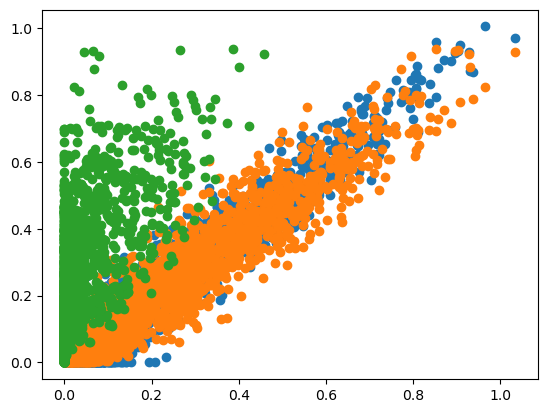

In [5]:
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [6]:
mycebmf.F

array([[2.00514725e-01, 2.05073438e-01, 0.00000000e+00, 7.06147196e-02,
        3.46703495e-04, 3.31957415e-01, 0.00000000e+00, 0.00000000e+00,
        1.36037056e-01, 1.73030622e-02],
       [2.29582497e-01, 1.93511239e-01, 9.04119820e-01, 1.17878504e-01,
        7.37863060e-01, 0.00000000e+00, 2.87600803e-01, 2.50928333e-01,
        0.00000000e+00, 2.62499446e-01],
       [0.00000000e+00, 0.00000000e+00, 8.03247947e-01, 0.00000000e+00,
        0.00000000e+00, 4.35197047e-02, 0.00000000e+00, 0.00000000e+00,
        3.05004707e-02, 0.00000000e+00],
       [4.60120978e-02, 0.00000000e+00, 7.29028384e-02, 2.90554460e-01,
        1.30931767e-02, 9.61634643e-02, 1.37686966e-01, 1.00487082e+00,
        3.55512224e-01, 8.77318815e-02],
       [1.38021912e-02, 1.63372029e-01, 6.11250737e-01, 4.49964056e-02,
        2.85945445e-01, 3.57774490e-02, 1.24831390e-03, 9.84832459e-01,
        5.24639751e-02, 2.47646868e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

In [7]:
mycebmf.iter()

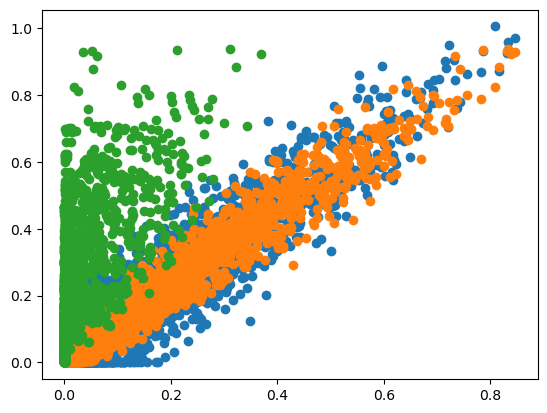

In [8]:
 
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [9]:
for i in range(40):
    mycebmf.iter()


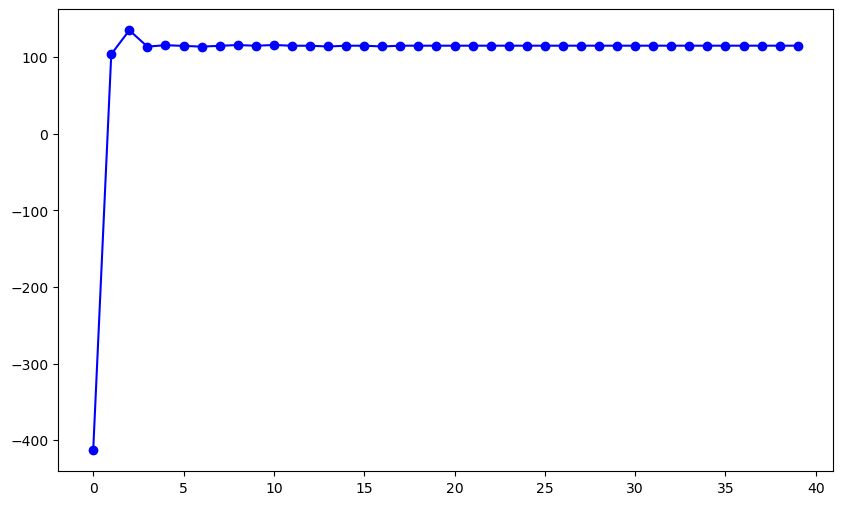

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[2:], marker='o', linestyle='-', color='b')

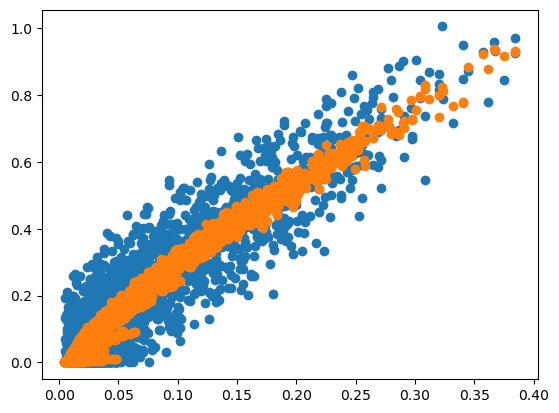

In [11]:
 
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)


[9.99995923e-01 3.31236655e-06 6.76870612e-07 8.23415175e-08
 4.43943876e-09 3.52418415e-10 2.24310886e-10 1.58894397e-10]


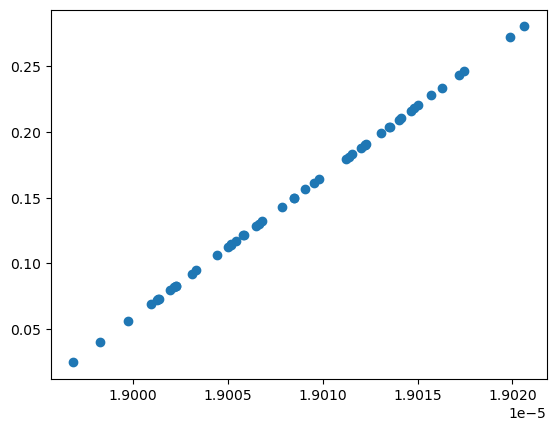

In [12]:
k=1
mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
 

ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = mycebmf.prior_L,
                      verbose=False
                      )
 
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
print(ash_obj.pi
      )
plt.scatter(ash_obj.post_mean, lhat)

In [13]:
mycebmf.L

array([[1.90150245e-05, 1.90150304e-05, 1.90150257e-05, 1.90150273e-05,
        1.90150274e-05, 1.90150360e-05, 1.90150261e-05, 1.90150362e-05,
        3.18354881e-01, 3.18351839e-01],
       [1.90135242e-05, 1.90135301e-05, 1.90135254e-05, 1.90135270e-05,
        1.90135271e-05, 1.90135357e-05, 1.90135258e-05, 1.90135359e-05,
        2.78837944e-01, 2.78835041e-01],
       [1.90051827e-05, 1.90051886e-05, 1.90051839e-05, 1.90051856e-05,
        1.90051857e-05, 1.90051942e-05, 1.90051843e-05, 1.90051944e-05,
        1.36395269e-01, 1.36394159e-01],
       [1.90033403e-05, 1.90033462e-05, 1.90033415e-05, 1.90033432e-05,
        1.90033433e-05, 1.90033518e-05, 1.90033419e-05, 1.90033520e-05,
        1.12566424e-01, 1.12565729e-01],
       [1.90031073e-05, 1.90031132e-05, 1.90031085e-05, 1.90031101e-05,
        1.90031102e-05, 1.90031188e-05, 1.90031089e-05, 1.90031190e-05,
        1.09291464e-01, 1.09290742e-01],
       [1.90013406e-05, 1.90013465e-05, 1.90013418e-05, 1.90013435e-05,
   

In [14]:
normal_means_loglik(x=lhat , 
                                            s=  s_l,
                                            Et=ash_obj.post_mean,
                                            Et2= ash_obj.post_mean2
                                           )

-235.54928445180502

In [15]:
ash_obj.log_lik


-235.54928454705882

In [16]:
x=lhat

s=  s_l
Et=ash_obj.post_mean
Et2= ash_obj.post_mean2
print(Et2)
print(Et[12])
lhat[11] 




[0.00018279 0.00018277 0.00018264 0.00018262 0.00018261 0.00018259
 0.00018275 0.00018266 0.00018278 0.0001828  0.00018286 0.00018277
 0.00018278 0.0001826  0.0001826  0.00018264 0.00018273 0.00018273
 0.00018256 0.00018277 0.00018267 0.0001827  0.00018258 0.00018268
 0.00018254 0.00018259 0.0001826  0.00018281 0.00018274 0.00018271
 0.00018263 0.00018258 0.00018269 0.00018276 0.00018265 0.00018275
 0.00018287 0.00018282 0.00018279 0.00018265 0.00018282 0.00018275
 0.00018252 0.00018264 0.00018265 0.00018266 0.00018271 0.0001826
 0.00018274 0.00018269]
1.9014654786975367e-05


0.2040212570182431

In [17]:
-0.5 * np.sum(np.log(2 * np.pi * s**2) + (1 / s**2) * (Et2 - 2 * x * Et + x**2))

-235.54928445180502

In [18]:
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = mycebmf.prior_L,
                      verbose=False
                      )
print(ash_obj.log_lik)


-235.54928454705882


In [19]:
ash_obj.pi

array([9.99995923e-01, 3.31236655e-06, 6.76870612e-07, 8.23415175e-08,
       4.43943876e-09, 3.52418415e-10, 2.24310886e-10, 1.58894397e-10])

In [20]:
betahat   =lhat
sebetahat =s_l 
prior     = mycebmf.prior_L
print(prior)

scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=np.sqrt(2))
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=True) 
print(optimal_pi)

exp
Converged after 64 iterations.
[9.99995926e-01 3.31184360e-06 6.76376035e-07 8.18935716e-08
 4.05799612e-09 5.01894007e-11 9.13054942e-14 1.50538715e-17]


[1.89927546e-05 1.89912583e-05 1.89829394e-05 1.89811019e-05
 1.89808695e-05 1.89791076e-05 1.89899518e-05 1.89842352e-05
 1.89918774e-05 1.89934535e-05 1.89976119e-05 1.89912450e-05
 1.89923800e-05 1.89797321e-05 1.89800298e-05 1.89827383e-05
 1.89889517e-05 1.89891143e-05 1.89775036e-05 1.89917292e-05
 1.89845726e-05 1.89868251e-05 1.89787015e-05 1.89855855e-05
 1.89760285e-05 1.89790587e-05 1.89799416e-05 1.89939987e-05
 1.89892966e-05 1.89875320e-05 1.89821692e-05 1.89790240e-05
 1.89862369e-05 1.89908282e-05 1.89836092e-05 1.89900041e-05
 1.89983334e-05 1.89948840e-05 1.89925419e-05 1.89835734e-05
 1.89951770e-05 1.89899794e-05 1.89746232e-05 1.89828964e-05
 1.89831674e-05 1.89843892e-05 1.89872561e-05 1.89800160e-05
 1.89897428e-05 1.89862441e-05]


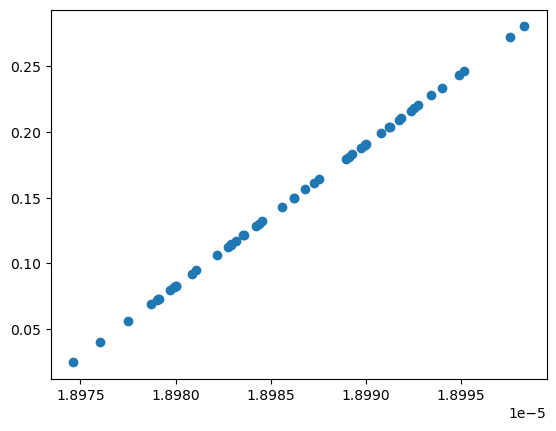

In [21]:
optimal_pi
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat= betahat ,
                        sebetahat=sebetahat ,
                                 log_pi=log_pi , 
                                 scale=scale)
plt.scatter(out.post_mean, lhat)
print(out.post_mean)


In [22]:
print(  np.sum(np.exp(L)*optimal_pi, axis=1) )

[0.00899586 0.00899587 0.00899594 0.00899595 0.00899595 0.00899595
 0.00899588 0.00899593 0.00899587 0.00899585 0.0089958  0.00899587
 0.00899586 0.00899595 0.00899595 0.00899594 0.00899589 0.00899589
 0.00899596 0.00899587 0.00899593 0.00899591 0.00899596 0.00899592
 0.00899596 0.00899595 0.00899595 0.00899584 0.00899589 0.00899591
 0.00899594 0.00899596 0.00899592 0.00899588 0.00899593 0.00899588
 0.00899579 0.00899583 0.00899586 0.00899593 0.00899583 0.00899588
 0.00899597 0.00899594 0.00899594 0.00899593 0.00899591 0.00899595
 0.00899589 0.00899592]


In [23]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
print( np.exp(L)*optimal_pi )

[[8.99581975e-03 2.95178448e-08 5.97359202e-09 7.10869981e-10
  3.41421724e-11 4.00515859e-13 6.70702560e-16 9.81489764e-20]
 [8.99583542e-03 2.95168417e-08 5.97330596e-09 7.10822919e-10
  3.41391292e-11 4.00469443e-13 6.70605573e-16 9.81320123e-20]
 [8.99590083e-03 2.95111926e-08 5.97170091e-09 7.10559554e-10
  3.41221303e-11 4.00210492e-13 6.70064977e-16 9.80375146e-20]
 [8.99591031e-03 2.95099284e-08 5.97134306e-09 7.10500992e-10
  3.41183574e-11 4.00153093e-13 6.69945260e-16 9.80166012e-20]
 [8.99591138e-03 2.95097680e-08 5.97129771e-09 7.10493576e-10
  3.41178798e-11 4.00145829e-13 6.69930110e-16 9.80139551e-20]
 [8.99591857e-03 2.95085494e-08 5.97095330e-09 7.10437272e-10
  3.41142551e-11 4.00090712e-13 6.69815195e-16 9.79938858e-20]
 [8.99584813e-03 2.95159626e-08 5.97305551e-09 7.10781748e-10
  3.41364684e-11 4.00428873e-13 6.70520823e-16 9.81171911e-20]
 [8.99589307e-03 2.95120807e-08 5.97195255e-09 7.10600770e-10
  3.41247872e-11 4.00250928e-13 6.70149340e-16 9.80522549e-20]


In [24]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)

print(L)

threshold_loglikelihood =  -300  # Example of a very small threshold
L = np.maximum(L,  (threshold_loglikelihood))
print(L)
log_lik =    np.sum(np.log(np.sum(np.exp(L)*optimal_pi, axis=1)))

[[-4.71099121 -4.7202653  -4.72940076 -4.74668623 -4.77791122 -4.83080578
  -4.91364048 -5.03290399]
 [-4.71098947 -4.72029929 -4.72944865 -4.74675244 -4.77800035 -4.83092167
  -4.9137851  -5.03307684]
 [-4.71098219 -4.72049069 -4.72971739 -4.74712301 -4.77849841 -4.8315685
  -4.91459155 -5.03404027]
 [-4.71098114 -4.72053353 -4.72977732 -4.74720543 -4.77860898 -4.83171193
  -4.91477023 -5.03425362]
 [-4.71098102 -4.72053896 -4.72978491 -4.74721587 -4.77862298 -4.83173009
  -4.91479285 -5.03428061]
 [-4.71098022 -4.72058026 -4.72984259 -4.74729512 -4.77872923 -4.83186784
  -4.9149644  -5.03448539]
 [-4.71098805 -4.72032907 -4.72949058 -4.74681036 -4.7780783  -4.83102299
  -4.91391148 -5.03322789]
 [-4.71098306 -4.7204606  -4.72967525 -4.74706501 -4.77842055 -4.83146747
  -4.91446566 -5.03388993]
 [-4.71099017 -4.72028521 -4.72942882 -4.74672503 -4.77796346 -4.8308737
  -4.91372524 -5.03300531]
 [-4.71099207 -4.72024948 -4.72937844 -4.74665535 -4.77786963 -4.83075169
  -4.91357298 -5.03

In [25]:
np.exp(L[1,]) 

array([0.00899587, 0.00891251, 0.00883134, 0.00867984, 0.0084128 ,
       0.00797916, 0.00734464, 0.00651872])

In [26]:
i=6
print(scale)
print(betahat[i]/sebetahat[i])
convolved_logpdf_exp(betahat=betahat[i],
                                         sebetahat=sebetahat[i],  
                                         scale=scale)

[ 0.          4.43467903  6.27158323  8.86935807 12.54316647 17.73871613
 25.08633294 35.47743227]
0.0042859270690005415


array([-4.71098805, -4.72032907, -4.72949058, -4.74681036, -4.7780783 ,
       -4.83102299, -4.91391148, -5.03322789])